# 347.前 K 个高频元素
力扣题目链接([opens new window](https://leetcode.cn/problems/top-k-frequent-elements/))

给定一个非空的整数数组，返回其中出现频率前 k 高的元素。

示例 1:

> 输入: nums = [1,1,1,2,2,3], k = 2<br/>
> 输出: [1,2]

示例 2:

> 输入: nums = [1], k = 1<br/>
> 输出: [1]

提示：

- 你可以假设给定的 k 总是合理的，且 1 ≤ k ≤ 数组中不相同的元素的个数。
- 你的算法的时间复杂度必须优于 $O(n \log n)$ , n 是数组的大小。
- 题目数据保证答案唯一，换句话说，数组中前 k 个高频元素的集合是唯一的。
- 你可以按任意顺序返回答案。
---

### 基础知识-堆（heap）
---
### 大顶堆：每个节点都大于或者等于它的子节点，小顶堆则反之。

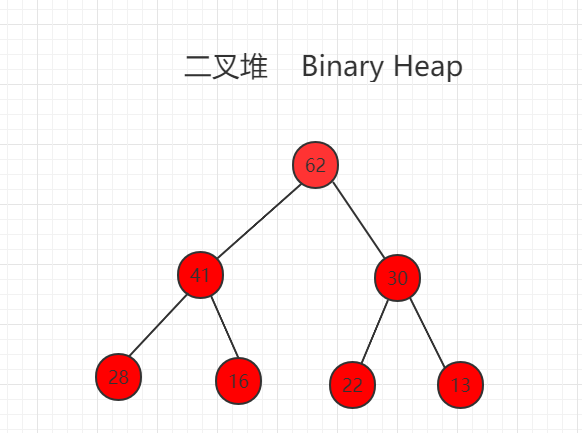

### 为什么要学习？

因为它在 **处理“最值”** 时效率极高：
- 看一眼第一名：只需 $O(1)$ 时间（就在堆顶）。
- 踢走第一名再选一个出来：只需 $O(\log N)$ 时间。
  
对比普通排序：如果你用普通排序找最大值，每次都要 $O(N \log N)$。如果你只需要知道前 $K$ 个最值，堆就是最省体力的工具。


### 堆是怎么在内存里排队的？（数组实现）
虽然我们画出来是树，但 Python 内部是用 **数组（列表）** 来存堆的。它有一套神奇的下标换算公式： 假设一个元素在数组里的下标是 i：

- 它的左孩子在：2*i + 1

- 它的右孩子在：2*i + 2

- 它的爸爸在：(i-1) // 2
  
(我们把堆顶设置为1时关系更加清楚)

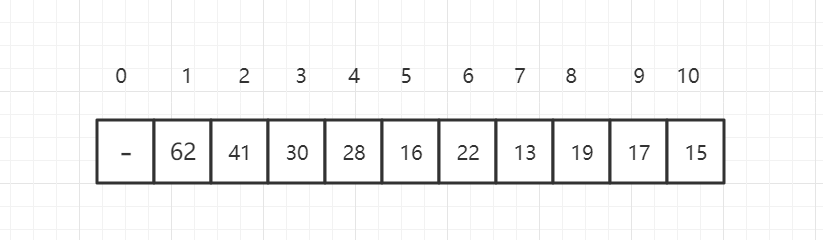

### 堆是怎么“自动维护”顺序的？
堆有两个动作：

1. **向上调整（Sift Up）** ： 新来一个元素，先放在最后面，然后不断跟它的“爸爸”比。如果它更小（小顶堆），就和爸爸交换位置，一直往上爬，直到爬不动。

2. **向下调整（Sift Down）** ： 当第一名（堆顶）走掉后，我们把最后一名临时拉到堆顶，然后它不断跟“儿子”比。如果它太大，就跟较小的儿子交换，一直往下沉，直到重新坐稳。
   
### python中使用堆

python中我们一半用`heapq`来模拟，`heapq`默认时小顶堆


In [2]:
import heapq

# 1.创建空堆
min_heap  = []

# 2. push 添加元素
heapq.heappush(min_heap,5)
heapq.heappush(min_heap,2)
heapq.heappush(min_heap, 8)
heapq.heappush(min_heap, 1)

print(min_heap[0])#堆顶是1

# 3.pop 弹出堆顶

smallest = heapq.heappop(min_heap)#弹出1

print(smallest)
print(min_heap[0])


1
1
2



### 📝 算法笔记：前 K 个高频元素 (Top K Frequent Elements)

#### 1. 核心思想

本题的目标是从$N$个元素中找出频率最高的 K个。

* **暴力法**：统计频率后全排序，复杂度 $O(N \log N)$ 。
* **堆方法**：利用**小顶堆**维护一个频率最高的“前 $K$ 名排行榜”，复杂度 $O(N \log K)$。当 $N$ 远大于 $K$ 时，效率显著提升。

#### 2. 为什么用“小顶堆”找“最大 $K$ 个”？

这是一个经典的**思维逆转**：

* 我们需要保留的是高频元素，剔除的是低频元素。
* **小顶堆**的堆顶永远是当前堆中**频率最低**的。
* **逻辑**：遍历频率字典时，如果堆满了（大小 $> K$），就将堆顶弹出。这样，**最弱的（低频）总被踢走，最后剩下的自然就是最强的（高频）**。

#### 3. Python 实现核心步骤



In [ ]:
import heapq
class Solution(object):
    def topKFrequent(nums, k):
        # 1. 统计频率：O(N)
        mapping = {}
        for num in nums:
            mapping[num] = mapping.get(num, 0) + 1
        
        # 2. 维护一个小顶堆：O(N log K)
        # 堆中存储元组 (频率, 元素)，Python 堆默认按第一个元素(频率)排序
        pri_que = [] 
        for num, freq in mapping.items():
            heapq.heappush(pri_que, (freq, num))
            # 只要堆超过 k，就弹出频率最小的那个
            if len(pri_que) > k:
                heapq.heappop(pri_que)
        
        # 3. 提取结果：O(K log K)
        res = []
        while pri_que:
            # 弹出并取元组中的元素 [1]，此时是从低频到高频
            res.append(heapq.heappop(pri_que)[1])
            
        return res # 或者 res[::-1] 如果需要高频在前

#### 4. 复杂度深度分析

* **时间复杂度**：$O(N \log K)$。
* 建立哈希表  $O(N)$。
* 遍历哈希表并操作堆  $O(N \log K)$。


* **空间复杂度**：$O(N)$。最坏情况下哈希表需要存储 $N$ 个不同的元素。

#### 5. 易错点提醒

* **元组顺序**：在 `heappush` 时必须是 `(freq, num)` 而不能是 `(num, freq)`，因为堆默认比较第一个位置。
* **堆的大小**：一定要在 `push` 之后立刻判断 `len > k` 并 `pop`，确保堆内始终只有 $K$ 个元素，这样单次操作才是 $\log K$。

In [26]:
import heapq
nums = [1,1,1,2,2,3]
k = 2
mapping = {}
for i in nums :
    mapping[i] = mapping.get(i,0) + 1


pri_que = []
for num , freq in mapping.items():
    heapq.heappush(pri_que,(freq,num))

    if len (pri_que) >k:heapq.heappop(pri_que)
# print(pri_que)
# print(heapq.heappop(pri_que)[1])
# print(pri_que)
res = []
while pri_que:
    res.append(heapq.heappop(pri_que)[1])

print(sorted(res))




[1, 2]
